In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# Load data
data = pd.read_csv('internet_usage.csv')

# Preprocessing: Handle missing values and convert columns to numeric
def preprocess_data(df):
    # Replace '..' with NaN
    df.replace('..', np.nan, inplace=True)
    
    # Convert numeric columns to float
    for col in df.columns[2:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Fill remaining NaN values with 0
    df.fillna(0, inplace=True)
    return df

data = preprocess_data(data)

In [3]:
# Detect and remove outliers using Z-score
def remove_outliers(df, threshold=3):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(zscore, nan_policy='omit')
    filtered_entries = (np.abs(z_scores) < threshold).all(axis=1)
    return df[filtered_entries]

data = remove_outliers(data)

In [5]:
# Demonstrate the use of Python objects in data analysis
class CountryAnalysis:
    def __init__(self, country_name, data):
        if 'Country Name' not in data.columns:
            raise ValueError("The dataset must contain a 'Country Name' column.")
        self.country_name = country_name
        self.data = data[data['Country Name'] == country_name]

    def get_mean_usage(self):
        if self.data.empty:
            return None
        return self.data.iloc[:, 2:].mean(axis=1).values[0]

    def get_max_usage_year(self):
        if self.data.empty:
            return None, None
        usage_data = self.data.iloc[:, 2:]
        max_year = usage_data.idxmax(axis=1).values[0]
        max_value = usage_data.max(axis=1).values[0]
        return max_year, max_value

# Example usage of the object
country_analysis = CountryAnalysis("India", data)
mean_usage = country_analysis.get_mean_usage()
if mean_usage is not None:
    print(f"Mean Internet Usage for India: {mean_usage}")
else:
    print("No data available for India.")

max_usage_year, max_usage_value = country_analysis.get_max_usage_year()
if max_usage_year is not None:
    print(f"Year with Maximum Usage for India: {max_usage_year}, Value: {max_usage_value}")
else:
    print("No data available for India.")


Mean Internet Usage for India: 9.254664916666666
Year with Maximum Usage for India: 2020, Value: 43.4054


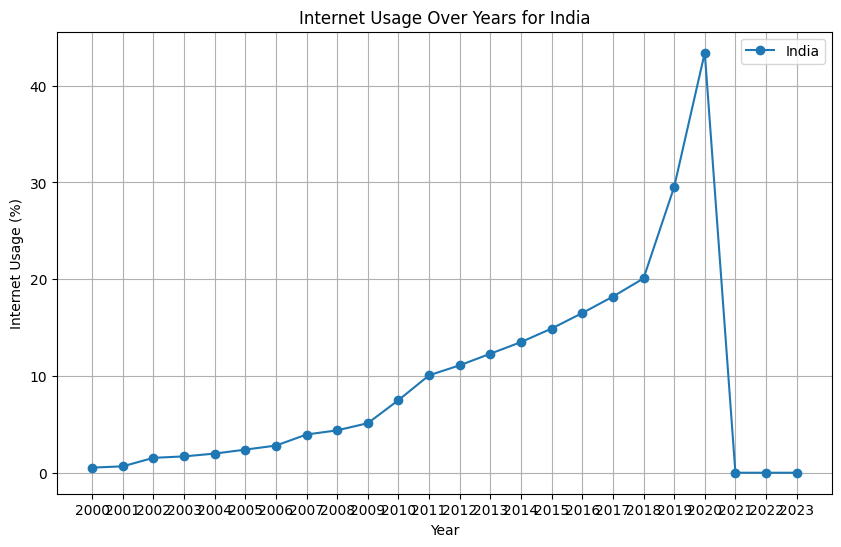

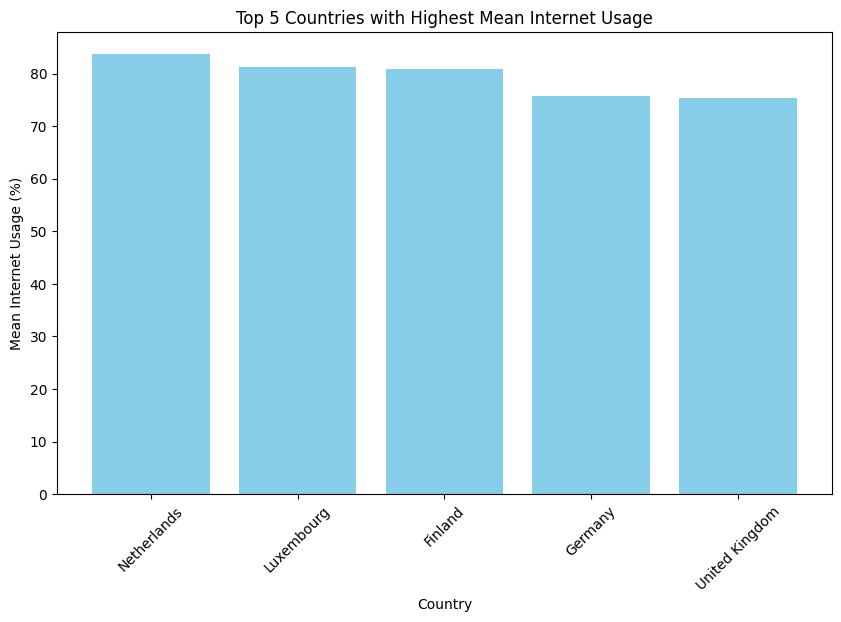

In [6]:
# Data Visualization 1: Line plot for a specific country
def plot_country_usage(country_name, data):
    if 'Country Name' not in data.columns:
        raise ValueError("The dataset must contain a 'Country Name' column.")
    country_data = data[data['Country Name'] == country_name]
    if country_data.empty:
        print(f"No data available for {country_name}.")
        return
    country_data = country_data.iloc[:, 2:].T
    country_data.columns = ['Usage']
    country_data.index.name = 'Year'
    country_data.reset_index(inplace=True)
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Usage'], marker='o', label=country_name)
    plt.title(f"Internet Usage Over Years for {country_name}")
    plt.xlabel("Year")
    plt.ylabel("Internet Usage (%)")
    plt.legend()
    plt.grid()
    plt.show()

# Data Visualization 2: Bar plot for top 5 countries with highest mean usage
def plot_top_countries(data, top_n=5):
    if 'Country Name' not in data.columns:
        raise ValueError("The dataset must contain a 'Country Name' column.")
    data['Mean Usage'] = data.iloc[:, 2:].mean(axis=1)
    top_countries = data.nlargest(top_n, 'Mean Usage')
    plt.figure(figsize=(10, 6))
    plt.bar(top_countries['Country Name'], top_countries['Mean Usage'], color='skyblue')
    plt.title(f"Top {top_n} Countries with Highest Mean Internet Usage")
    plt.xlabel("Country")
    plt.ylabel("Mean Internet Usage (%)")
    plt.xticks(rotation=45)
    plt.show()

# Example visualizations
plot_country_usage("India", data)
plot_top_countries(data)